<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Word_Embeddings_Word2Vec_Week_C_5_(D2)_Class_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Word Embeddings (Word2Vec) – API Corpus + Training + Mini Classification

**Topics:** Education, Health, Sports, Technology  
**Tools:** Wikipedia API, Gensim Word2Vec, Scikit-learn, Matplotlib

---

## 🔧 Install & Import Dependencies

In [1]:
# Install required packages (run once in Colab)
!pip install gensim wikipedia-api nltk scikit-learn matplotlib pandas numpy -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 30.0 MB/s eta 0:00:00


In [2]:
import wikipediaapi
import pandas as pd
import numpy as np
import re
import time
import string
import nltk
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

print("✅ All libraries imported successfully!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


✅ All libraries imported successfully!


---
## Part A – Dataset Preparation using Wikipedia API

In [3]:
# Initialize Wikipedia API
wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent='Word2VecClasswork/1.0 (student@university.edu)'
)

# Define topics and their seed article titles
topics = {
    'education': [
        'Education', 'School', 'University', 'Teacher', 'Curriculum',
        'Classroom', 'Literacy', 'Higher education', 'Primary education',
        'Secondary education', 'Learning', 'Pedagogy', 'Student',
        'Academic degree', 'Kindergarten', 'Homeschooling', 'Scholarship',
        'Vocational education', 'Distance education', 'Educational psychology',
        'Library', 'Textbook', 'Homework', 'Examination', 'Diploma',
        'Public school', 'Private school', 'College', 'Professor', 'Tutor'
    ],
    'health': [
        'Health', 'Medicine', 'Hospital', 'Nurse', 'Doctor',
        'Surgery', 'Pharmacy', 'Vaccine', 'Nutrition', 'Mental health',
        'Public health', 'Disease', 'Diabetes', 'Cancer', 'Cardiology',
        'Epidemiology', 'Pandemic', 'Antibiotic', 'Anatomy', 'Physiology',
        'First aid', 'Physical therapy', 'Dentistry', 'Pediatrics', 'Geriatrics',
        'Psychiatry', 'Dermatology', 'Immunology', 'Pathology', 'Radiology'
    ],
    'sports': [
        'Football', 'Basketball', 'Tennis', 'Cricket', 'Swimming',
        'Athletics', 'Olympics', 'FIFA', 'Baseball', 'Golf',
        'Rugby', 'Volleyball', 'Boxing', 'Cycling', 'Marathon',
        'Gymnastics', 'Badminton', 'Ice hockey', 'Wrestling', 'Archery',
        'Skiing', 'Skateboarding', 'Surfing', 'Rowing', 'Fencing',
        'Triathlon', 'Weightlifting', 'Judo', 'Karate', 'Taekwondo'
    ],
    'technology': [
        'Artificial intelligence', 'Computer', 'Internet', 'Robotics', 'Blockchain',
        'Software', 'Machine learning', 'Smartphone', 'Cloud computing', 'Cybersecurity',
        'Programming language', 'Database', 'Semiconductor', 'Virtual reality', '5G',
        'Nanotechnology', 'Biotechnology', 'Quantum computing', 'Autonomous vehicle', 'Drone',
        'Big data', 'Internet of things', 'Augmented reality', 'Deep learning', 'Neural network',
        'Algorithm', 'Encryption', 'Operating system', 'Data science', 'Networking'
    ]
}

print(f"📋 Total planned articles: {sum(len(v) for v in topics.values())}")

📋 Total planned articles: 120


In [4]:
# Fetch Wikipedia article summaries
data = []

for category, article_list in topics.items():
    print(f"\n🔍 Fetching category: {category.upper()}")
    count = 0
    for title in article_list:
        try:
            page = wiki.page(title)
            if page.exists() and len(page.summary) > 100:
                data.append({
                    'title': title,
                    'category': category,
                    'text': page.summary
                })
                count += 1
                time.sleep(0.2)  # Be polite to the API
        except Exception as e:
            print(f"  ⚠️  Skipping '{title}': {e}")
    print(f"  ✅ Fetched {count} articles")

# Create DataFrame
df = pd.DataFrame(data)
print(f"\n📊 Total articles collected: {len(df)}")


🔍 Fetching category: EDUCATION
  ✅ Fetched 30 articles

🔍 Fetching category: HEALTH
  ✅ Fetched 30 articles

🔍 Fetching category: SPORTS
  ✅ Fetched 28 articles

🔍 Fetching category: TECHNOLOGY
  ✅ Fetched 28 articles

📊 Total articles collected: 116


💾 Dataset saved to: wikipedia_corpus.csv

📐 Dataset Shape: (116, 3)

📊 Category Distribution:
category
education     30
health        30
sports        28
technology    28
Name: count, dtype: int64


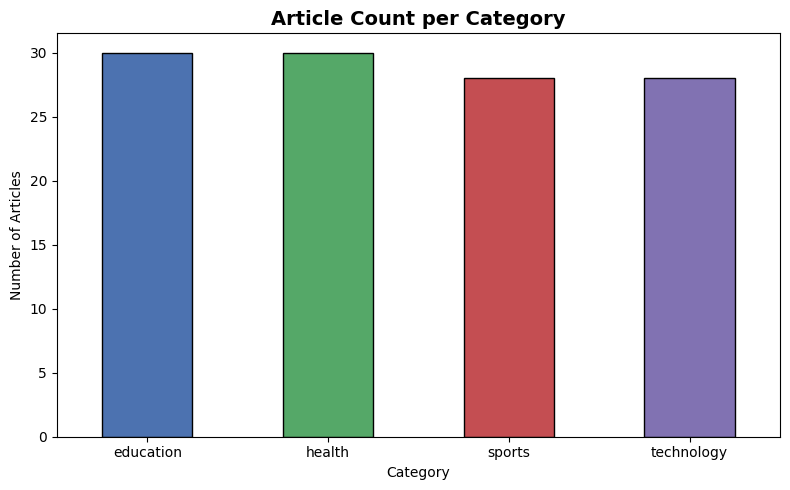


📄 Sample rows:


,title,category,text
0,Education,education,Education is the transmission of knowledge and...
1,School,education,"A school is an educational institution (and, i..."
2,University,education,A university (from Latin universitas 'a whole...


In [5]:
# Save to CSV
df.to_csv('wikipedia_corpus.csv', index=False)
print("💾 Dataset saved to: wikipedia_corpus.csv")

# Show dataset shape and category distribution
print(f"\n📐 Dataset Shape: {df.shape}")
print("\n📊 Category Distribution:")
print(df['category'].value_counts())

# Visualize distribution
plt.figure(figsize=(8, 5))
df['category'].value_counts().plot(kind='bar', color=['#4C72B0','#55A868','#C44E52','#8172B2'], edgecolor='black')
plt.title('Article Count per Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('category_distribution.png', dpi=150)
plt.show()
print("\n📄 Sample rows:")
df.head(3)

---
## Part B – Preprocessing

In [6]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Lowercase, remove punctuation, tokenize, remove stopwords, keep len >= 2."""
    # Lowercase
    text = text.lower()
    # Remove punctuation and extra spaces
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and short tokens
    tokens = [t for t in tokens if t not in stop_words and len(t) >= 2]
    return tokens

# Apply preprocessing
df['tokens'] = df['text'].apply(preprocess_text)

print("✅ Preprocessing complete!")
print(f"Vocabulary (unique tokens): {len(set(t for tokens in df['tokens'] for t in tokens))}")

✅ Preprocessing complete!
Vocabulary (unique tokens): 5550


In [7]:
# Show 3 examples before/after preprocessing
print("=" * 70)
print("3 EXAMPLES: BEFORE vs AFTER PREPROCESSING")
print("=" * 70)

for i in range(3):
    print(f"\n--- Example {i+1} | Category: {df.iloc[i]['category'].upper()} ---")
    print(f"BEFORE: {df.iloc[i]['text'][:250]}...")
    print(f"AFTER : {df.iloc[i]['tokens'][:20]}")
    print()

3 EXAMPLES: BEFORE vs AFTER PREPROCESSING

--- Example 1 | Category: EDUCATION ---
BEFORE: Education is the transmission of knowledge and skills and the development of character traits. Formal education happens in a complex institutional framework, like public schools. Non-formal education is also structured but takes place outside the for...
AFTER : ['education', 'transmission', 'knowledge', 'skills', 'development', 'character', 'traits', 'formal', 'education', 'happens', 'complex', 'institutional', 'framework', 'like', 'public', 'schools', 'nonformal', 'education', 'also', 'structured']


--- Example 2 | Category: EDUCATION ---
BEFORE: A school is an educational institution (and, in the case of in-person learning, the building) designed to provide learning environments for the teaching of students, usually under the direction of teachers. Most countries have systems of formal educa...
AFTER : ['school', 'educational', 'institution', 'case', 'inperson', 'learning', 'building', 'design

---
## Part C – Train Word2Vec

In [8]:
# Prepare sentences (list of token lists)
sentences = df['tokens'].tolist()

# ── Train CBOW (sg=0) ──────────────────────────────────────────────────
print("Training CBOW model...")
start = time.time()
cbow_model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=2,
    sg=0,          # CBOW
    workers=4,
    epochs=10,
    seed=42
)
cbow_time = time.time() - start
cbow_model.save('cbow_model.model')
print(f"✅ CBOW trained in {cbow_time:.2f}s | Vocab size: {len(cbow_model.wv)}")

# ── Train Skip-gram (sg=1) ─────────────────────────────────────────────
print("\nTraining Skip-gram model...")
start = time.time()
sg_model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=2,
    sg=1,          # Skip-gram
    workers=4,
    epochs=10,
    seed=42
)
sg_time = time.time() - start
sg_model.save('skipgram_model.model')
print(f"✅ Skip-gram trained in {sg_time:.2f}s | Vocab size: {len(sg_model.wv)}")

# ── Comparison ─────────────────────────────────────────────────────────
print("\n" + "=" * 50)
print("  MODEL COMPARISON")
print("=" * 50)
print(f"  {'Model':<15} {'Training Time':>15} {'Vocab Size':>12}")
print(f"  {'-'*42}")
print(f"  {'CBOW (sg=0)':<15} {cbow_time:>13.2f}s {len(cbow_model.wv):>12}")
print(f"  {'Skip-gram (sg=1)':<15} {sg_time:>13.2f}s {len(sg_model.wv):>12}")
print("=" * 50)
print("💡 Skip-gram is usually slower but better for rare words.")
print("💾 Both models saved to disk.")

Training CBOW model...
✅ CBOW trained in 0.37s | Vocab size: 2531

Training Skip-gram model...
✅ Skip-gram trained in 0.93s | Vocab size: 2531

  MODEL COMPARISON
  Model             Training Time   Vocab Size
  ------------------------------------------
  CBOW (sg=0)              0.37s         2531
  Skip-gram (sg=1)          0.93s         2531
💡 Skip-gram is usually slower but better for rare words.
💾 Both models saved to disk.


---
## Part D – Embedding Experiments

In [9]:
# ── D1: Top-10 Most Similar Words for 5 Keywords ──────────────────────
keywords = ['teacher', 'hospital', 'football', 'computer', 'student']

print("=" * 65)
print("  TOP-10 SIMILAR WORDS (CBOW vs Skip-gram)")
print("=" * 65)

for keyword in keywords:
    print(f"\n🔑 Keyword: '{keyword}'")
    print(f"  {'CBOW':<35} {'Skip-gram':<35}")
    print(f"  {'-'*65}")

    cbow_results, sg_results = [], []

    if keyword in cbow_model.wv:
        cbow_results = cbow_model.wv.most_similar(keyword, topn=10)
    else:
        print(f"  ⚠️  '{keyword}' not in CBOW vocab")

    if keyword in sg_model.wv:
        sg_results = sg_model.wv.most_similar(keyword, topn=10)
    else:
        print(f"  ⚠️  '{keyword}' not in Skip-gram vocab")

    for j in range(max(len(cbow_results), len(sg_results))):
        c = f"{cbow_results[j][0]} ({cbow_results[j][1]:.3f})" if j < len(cbow_results) else ""
        s = f"{sg_results[j][0]} ({sg_results[j][1]:.3f})" if j < len(sg_results) else ""
        print(f"  {c:<35} {s:<35}")

  TOP-10 SIMILAR WORDS (CBOW vs Skip-gram)

🔑 Keyword: 'teacher'
  CBOW                                Skip-gram                          
  -----------------------------------------------------------------
  security (0.994)                    highly (0.998)                     
  biotechnology (0.994)               universitas (0.998)                
  vocational (0.994)                  foundation (0.998)                 
  medical (0.994)                     regulations (0.998)                
  two (0.994)                         governments (0.998)                
  since (0.994)                       taken (0.998)                      
  early (0.994)                       mean (0.998)                       
  often (0.994)                       remain (0.998)                     
  processing (0.994)                  amount (0.998)                     
  advanced (0.994)                    terminology (0.997)                

🔑 Keyword: 'hospital'
  CBOW                        

In [10]:
# ── D2: Analogy Tests ─────────────────────────────────────────────────
print("=" * 60)
print("  ANALOGY TESTS")
print("=" * 60)

analogies = [
    # Format: (positive1, positive2, negative, description)
    (['hospital', 'education'], ['patient'], 'hospital - patient + student = ?'),
    (['computer', 'hospital'],  ['software'], 'computer - software + disease = ?'),
]

analogy_tests = [
    {
        'positive': ['hospital', 'student'],
        'negative': ['patient'],
        'description': "hospital - patient + student = ? (school/education related)"
    },
    {
        'positive': ['football', 'hospital'],
        'negative': ['player'],
        'description': "football - player + doctor = ? (sports + health analogy)"
    }
]

for test in analogy_tests:
    print(f"\n🧪 Analogy: {test['description']}")
    for model_name, model in [('CBOW', cbow_model), ('Skip-gram', sg_model)]:
        try:
            # Check all words exist in vocabulary
            all_words = test['positive'] + test['negative']
            missing = [w for w in all_words if w not in model.wv]
            if missing:
                print(f"  [{model_name}] ⚠️  Missing words: {missing}")
                continue
            result = model.wv.most_similar(
                positive=test['positive'],
                negative=test['negative'],
                topn=3
            )
            top = ', '.join([f"{w}({s:.3f})" for w, s in result])
            print(f"  [{model_name}] → {top}")
        except Exception as e:
            print(f"  [{model_name}] Error: {e}")

  ANALOGY TESTS

🧪 Analogy: hospital - patient + student = ? (school/education related)
  [CBOW] → years(0.989), humans(0.989), score(0.989)
  [Skip-gram] → setting(0.993), diploma(0.993), content(0.992)

🧪 Analogy: football - player + doctor = ? (sports + health analogy)
  [CBOW] → developed(0.997), several(0.997), educational(0.997)
  [Skip-gram] → international(0.922), rules(0.899), association(0.890)


🗺️  Running t-SNE on 50 word vectors...


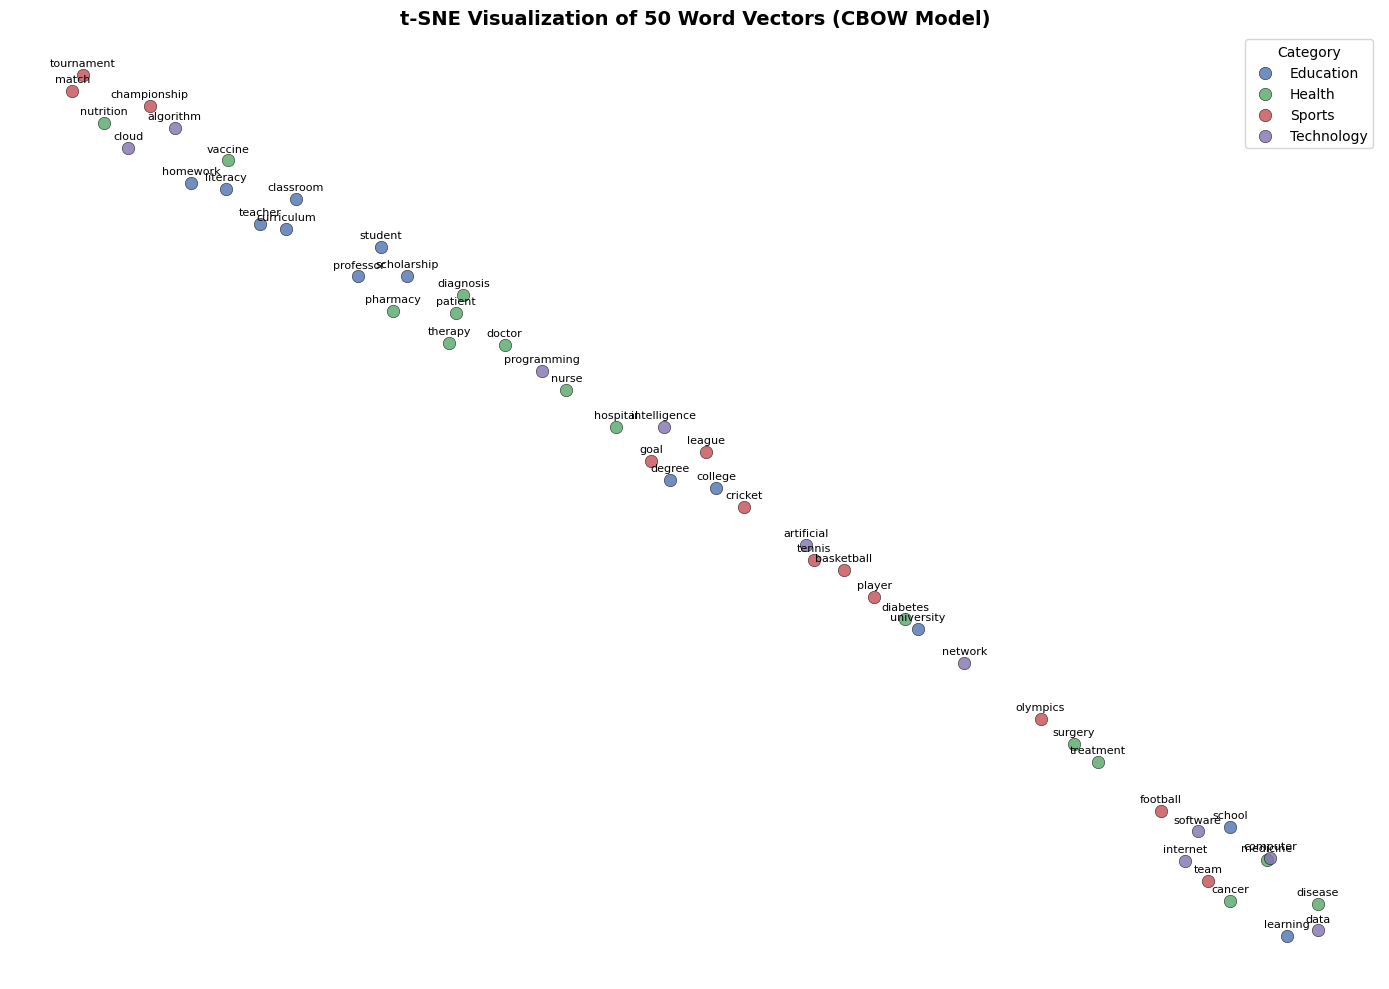

✅ t-SNE plot saved as 'tsne_visualization.png'


In [11]:
# ── D3: t-SNE Visualization of 50 Word Vectors ────────────────────────
# Select 50 representative words (mix of categories)
selected_words = []
word_categories = []

word_groups = {
    'education': ['teacher', 'student', 'school', 'university', 'learning',
                  'curriculum', 'classroom', 'degree', 'college', 'homework',
                  'scholarship', 'literacy', 'textbook', 'exam', 'professor'],
    'health':    ['hospital', 'doctor', 'medicine', 'patient', 'vaccine',
                  'disease', 'surgery', 'nurse', 'cancer', 'diabetes',
                  'therapy', 'pharmacy', 'nutrition', 'diagnosis', 'treatment'],
    'sports':    ['football', 'basketball', 'cricket', 'tennis', 'olympics',
                  'athlete', 'tournament', 'championship', 'stadium', 'coach',
                  'match', 'league', 'player', 'goal', 'team'],
    'technology':['computer', 'software', 'internet', 'algorithm', 'data',
                  'network', 'artificial', 'intelligence', 'programming', 'robot',
                  'cloud', 'digital', 'technology', 'hardware', 'cybersecurity']
}

colors = {'education': '#4C72B0', 'health': '#55A868', 'sports': '#C44E52', 'technology': '#8172B2'}
color_list = []

for cat, words in word_groups.items():
    for w in words:
        if w in cbow_model.wv:
            selected_words.append(w)
            word_categories.append(cat)
            color_list.append(colors[cat])

# Limit to exactly 50
selected_words = selected_words[:50]
word_categories = word_categories[:50]
color_list = color_list[:50]

# Get vectors
vectors = np.array([cbow_model.wv[w] for w in selected_words])

# t-SNE
print(f"🗺️  Running t-SNE on {len(selected_words)} word vectors...")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(15, len(selected_words)-1), max_iter=1000)
reduced = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(14, 10))
for cat, color in colors.items():
    idx = [i for i, c in enumerate(word_categories) if c == cat]
    plt.scatter(reduced[idx, 0], reduced[idx, 1], c=color, label=cat.capitalize(), s=80, alpha=0.8, edgecolors='k', linewidths=0.4)

for i, word in enumerate(selected_words):
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]),
                 fontsize=8, ha='center', va='bottom',
                 xytext=(0, 5), textcoords='offset points')

plt.title('t-SNE Visualization of 50 Word Vectors (CBOW Model)', fontsize=14, fontweight='bold')
plt.legend(title='Category', fontsize=10)
plt.axis('off')
plt.tight_layout()
plt.savefig('tsne_visualization.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ t-SNE plot saved as 'tsne_visualization.png'")

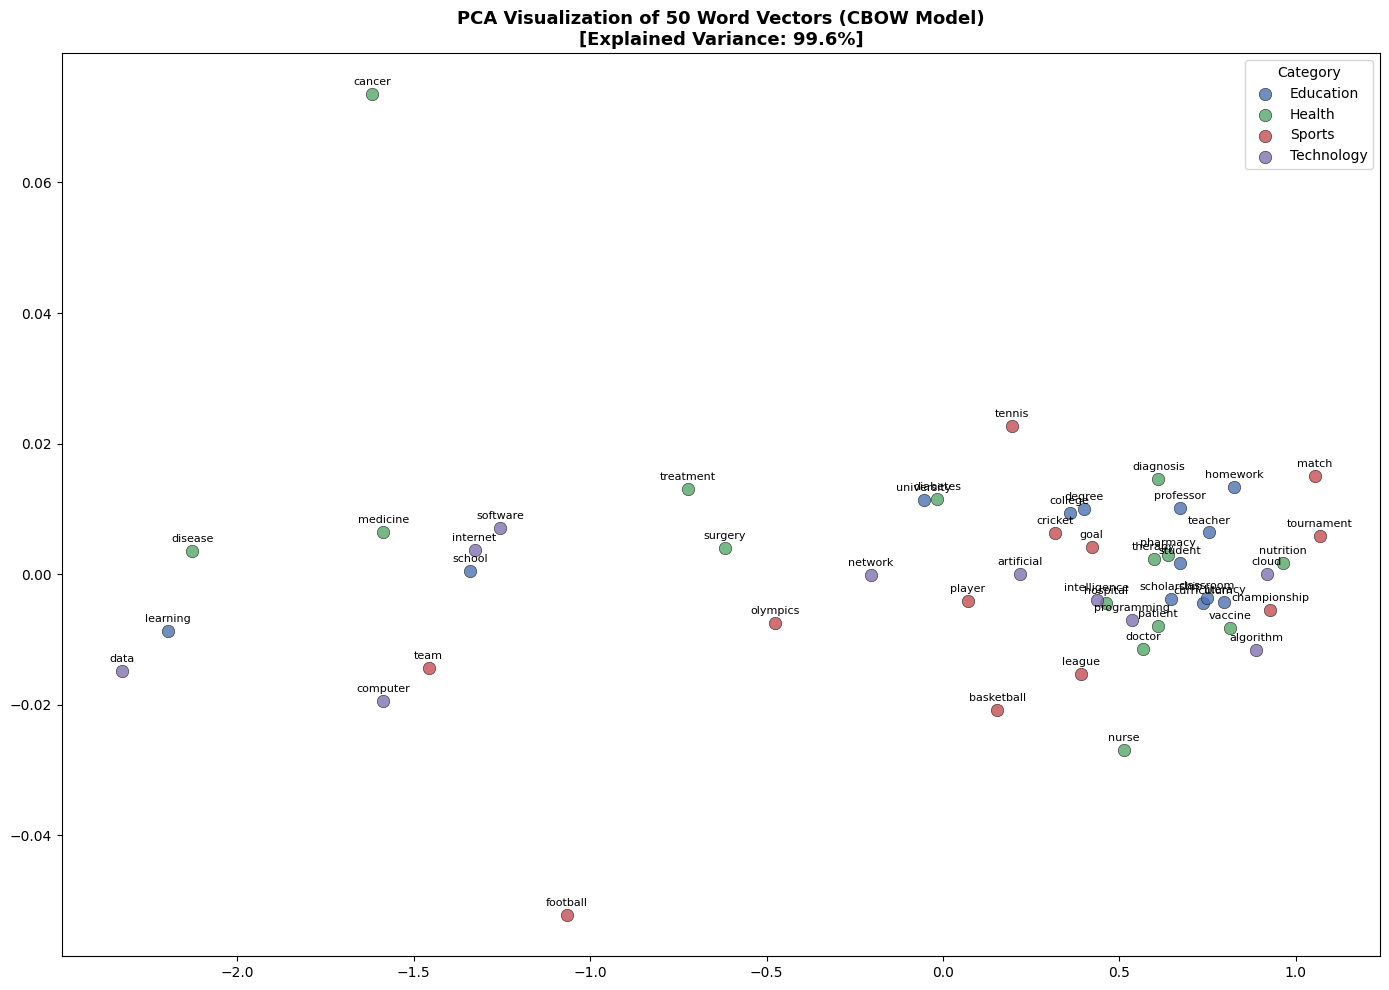

✅ PCA plot saved as 'pca_visualization.png'


In [12]:
# Also do PCA for comparison
pca = PCA(n_components=2, random_state=42)
pca_reduced = pca.fit_transform(vectors)

plt.figure(figsize=(14, 10))
for cat, color in colors.items():
    idx = [i for i, c in enumerate(word_categories) if c == cat]
    plt.scatter(pca_reduced[idx, 0], pca_reduced[idx, 1], c=color, label=cat.capitalize(), s=80, alpha=0.8, edgecolors='k', linewidths=0.4)

for i, word in enumerate(selected_words):
    plt.annotate(word, (pca_reduced[i, 0], pca_reduced[i, 1]),
                 fontsize=8, ha='center', va='bottom',
                 xytext=(0, 5), textcoords='offset points')

plt.title(f'PCA Visualization of 50 Word Vectors (CBOW Model)\n[Explained Variance: {pca.explained_variance_ratio_.sum()*100:.1f}%]',
          fontsize=13, fontweight='bold')
plt.legend(title='Category', fontsize=10)
plt.tight_layout()
plt.savefig('pca_visualization.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ PCA plot saved as 'pca_visualization.png'")

---
## Part E – Simple Classification (Document Embeddings)

In [13]:
# ── E1: Create Document Vectors by Averaging Word Embeddings ──────────
def get_doc_vector(tokens, model):
    """Average the word vectors for all tokens in the document."""
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Create document vectors using CBOW model
print("Creating document vectors (CBOW)...")
X_cbow = np.array([get_doc_vector(tokens, cbow_model) for tokens in df['tokens']])
y = df['category'].values

# Also create with Skip-gram
print("Creating document vectors (Skip-gram)...")
X_sg = np.array([get_doc_vector(tokens, sg_model) for tokens in df['tokens']])

print(f"✅ Document matrix shape: {X_cbow.shape}")
print(f"   Classes: {np.unique(y)}")

Creating document vectors (CBOW)...
Creating document vectors (Skip-gram)...
✅ Document matrix shape: (116, 100)
   Classes: ['education' 'health' 'sports' 'technology']


In [14]:
# ── E2: Train Logistic Regression Classifier ──────────────────────────
results = {}

for model_name, X in [('CBOW', X_cbow), ('Skip-gram', X_sg)]:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = {'clf': clf, 'y_test': y_test, 'y_pred': y_pred, 'acc': acc}
    print(f"\n{'='*55}")
    print(f" 📊 {model_name} – Logistic Regression Classification")
    print(f"{'='*55}")
    print(f" Accuracy: {acc*100:.2f}%")
    print(f"\n Classification Report:\n")
    print(classification_report(y_test, y_pred))


 📊 CBOW – Logistic Regression Classification
 Accuracy: 41.67%

 Classification Report:

              precision    recall  f1-score   support

   education       0.50      1.00      0.67         6
      health       0.00      0.00      0.00         6
      sports       0.33      0.67      0.44         6
  technology       0.00      0.00      0.00         6

    accuracy                           0.42        24
   macro avg       0.21      0.42      0.28        24
weighted avg       0.21      0.42      0.28        24


 📊 Skip-gram – Logistic Regression Classification
 Accuracy: 83.33%

 Classification Report:

              precision    recall  f1-score   support

   education       1.00      0.50      0.67         6
      health       0.60      1.00      0.75         6
      sports       1.00      1.00      1.00         6
  technology       1.00      0.83      0.91         6

    accuracy                           0.83        24
   macro avg       0.90      0.83      0.83        24


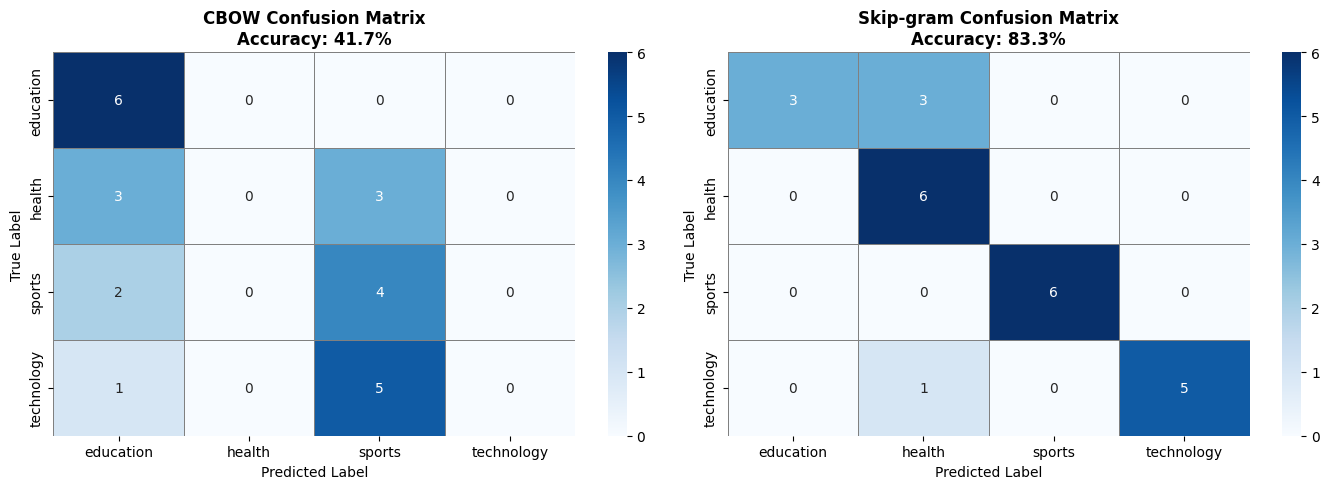

✅ Confusion matrix saved as 'confusion_matrix.png'


In [15]:
# ── E3: Confusion Matrix Plots ────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
class_labels = sorted(np.unique(y))

for ax, (model_name, res) in zip(axes, results.items()):
    cm = confusion_matrix(res['y_test'], res['y_pred'], labels=class_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels,
                ax=ax, linewidths=0.5, linecolor='gray')
    ax.set_title(f'{model_name} Confusion Matrix\nAccuracy: {res["acc"]*100:.1f}%',
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Confusion matrix saved as 'confusion_matrix.png'")

---
## 📋 Summary

In [16]:
print("=" * 60)
print("  FINAL SUMMARY")
print("=" * 60)
print(f"  Dataset: {len(df)} Wikipedia articles (4 categories)")
print(f"  CBOW vocab size   : {len(cbow_model.wv)}")
print(f"  Skip-gram vocab   : {len(sg_model.wv)}")
print(f"  CBOW accuracy     : {results['CBOW']['acc']*100:.2f}%")
print(f"  Skip-gram accuracy: {results['Skip-gram']['acc']*100:.2f}%")
print("\n  Saved files:")
print("  ├── wikipedia_corpus.csv")
print("  ├── cbow_model.model")
print("  ├── skipgram_model.model")
print("  ├── tsne_visualization.png")
print("  ├── pca_visualization.png")
print("  ├── confusion_matrix.png")
print("  └── category_distribution.png")
print("=" * 60)

  FINAL SUMMARY
  Dataset: 116 Wikipedia articles (4 categories)
  CBOW vocab size   : 2531
  Skip-gram vocab   : 2531
  CBOW accuracy     : 41.67%
  Skip-gram accuracy: 83.33%

  Saved files:
  ├── wikipedia_corpus.csv
  ├── cbow_model.model
  ├── skipgram_model.model
  ├── tsne_visualization.png
  ├── pca_visualization.png
  ├── confusion_matrix.png
  └── category_distribution.png
